# Practice case

## The Database:

The sales database of a furniture e-commerce site (marketplace).

## Variables:

**Cod_cmd:** Order code.

**Libellé produit:** Description of the sold products.

**Vendeur:** Sellers.

**Univers:** Product categories.

**Nature:** Subcategories of the sold products.

**Date de commande:** Order date.

**Montant cmd:** Order amount.

**Quantité:** Quantity sold.

**Prix transport:** Transport price.

**Délai transport annoncé:** Transport delay announced by the seller.

### Importing necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from nltk.tokenize import word_tokenize
import nltk
from unidecode import unidecode 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing the dataset

In [7]:
d = pd.read_excel('C:/Users/etulyon1/Desktop/Data-Science/Practice Case/Data/20210614 Ecommerce sales.xlsb')
d.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10.0
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10.0
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10.0
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10.0
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,44238,61,1,19.08,10.0


## Data Cleaning

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525034 entries, 0 to 525033
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cod_cmd                  525034 non-null  int64  
 1   Libellé produit          525034 non-null  object 
 2   Vendeur                  525034 non-null  object 
 3   Univers                  507347 non-null  object 
 4   Nature                   513289 non-null  object 
 5   Date de commande         525034 non-null  int64  
 6   Montant cmd              525034 non-null  int64  
 7   Quantité                 525034 non-null  int64  
 8   Prix transport           525034 non-null  float64
 9   Délai transport annoncé  285611 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 40.1+ MB


In [9]:
d.dropna(inplace=True)
d['Montant cmd sans transport'] = d['Montant cmd'] - d['Prix transport']
d.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10.0,237.33
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10.0,18.08
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10.0,5.08
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10.0,364.25
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,44238,61,1,19.08,10.0,41.92


In [10]:
d['Date de commande'] = pd.to_datetime(d['Date de commande'], errors='coerce', unit='D', origin='1900-01-01')
d = d[~d['Date de commande'].isna()]
d['Date de commande'] = d['Date de commande'].dt.strftime('%Y-%m-%d')
d['Date de commande'] = d['Date de commande'].apply(lambda x: datetime.fromisoformat(x))
d.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-22,244,4,6.67,10.0,237.33
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-19,28,1,9.92,10.0,18.08
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-20,15,1,9.92,10.0,5.08
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-25,385,2,20.75,10.0,364.25
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-13,61,1,19.08,10.0,41.92


In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284496 entries, 0 to 525033
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Cod_cmd                     284496 non-null  int64         
 1   Libellé produit             284496 non-null  object        
 2   Vendeur                     284496 non-null  object        
 3   Univers                     284496 non-null  object        
 4   Nature                      284496 non-null  object        
 5   Date de commande            284496 non-null  datetime64[ns]
 6   Montant cmd                 284496 non-null  int64         
 7   Quantité                    284496 non-null  int64         
 8   Prix transport              284496 non-null  float64       
 9   Délai transport annoncé     284496 non-null  float64       
 10  Montant cmd sans transport  284496 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), 

In [12]:
for column in d.columns:
    null = d[column].isna().sum()
    print(f"{column} : {null}")

Cod_cmd : 0
Libellé produit : 0
Vendeur : 0
Univers : 0
Nature : 0
Date de commande : 0
Montant cmd : 0
Quantité : 0
Prix transport : 0
Délai transport annoncé : 0
Montant cmd sans transport : 0


In [13]:
for column in d.columns:
    null = (d[column].duplicated().sum()/len(d[column]))*100
    print(f"{column} : {null}")

Cod_cmd : 24.762035318598503
Libellé produit : 83.79063326022158
Vendeur : 99.9975395084641
Univers : 99.99648501209157
Nature : 99.8049181710815
Date de commande : 99.96836510882403
Montant cmd : 99.29665091952083
Quantité : 99.98769754232045
Prix transport : 99.82460210336876
Délai transport annoncé : 99.97398908947753
Montant cmd sans transport : 96.68431190596705


## Data Visualization

Revenue breakdown of sellers

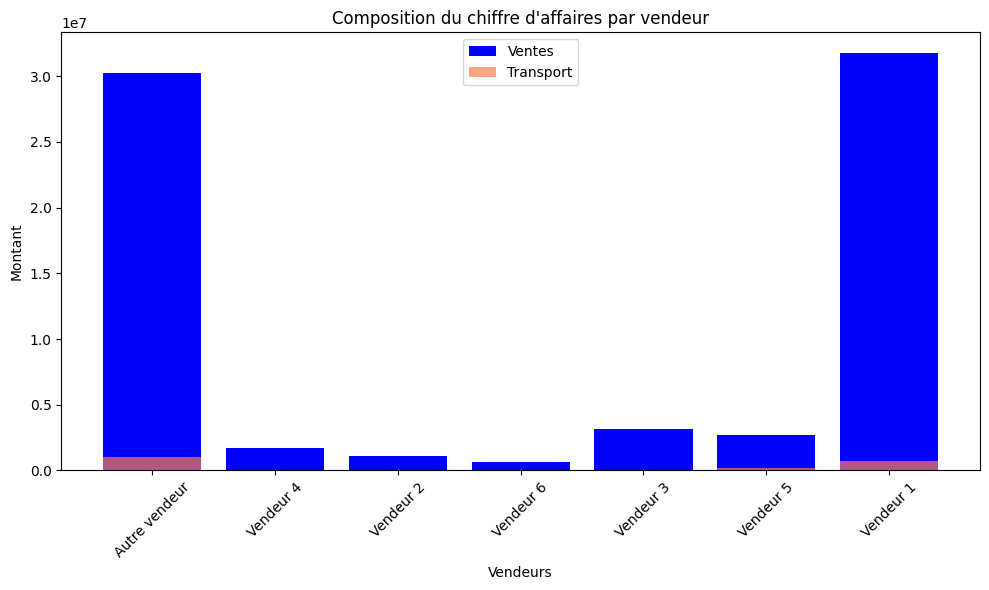

In [14]:

vente_vendeurs = {}
for vendeur, vente, transport in zip(d['Vendeur'], d['Montant cmd sans transport'], d['Prix transport']):
    if vendeur in vente_vendeurs:
        vente_vendeurs[vendeur][0] += vente
        vente_vendeurs[vendeur][1] += transport
    else:
        vente_vendeurs[vendeur] = [vente, transport]


nom_vendeurs = list(vente_vendeurs.keys())
tot_ventes = [sum(values) for values in vente_vendeurs.values()]
tot_transports = [values[1] for values in vente_vendeurs.values()]


plt.figure(figsize=(10, 6))
plt.bar(nom_vendeurs, tot_ventes, label='Ventes', color='blue')
plt.bar(nom_vendeurs, tot_transports, label='Transport', color='coral', alpha=0.7)
plt.xlabel('Vendeurs')
plt.ylabel('Montant')
plt.title('Composition du chiffre d\'affaires par vendeur')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Sales Trend in the Marketplace

In [15]:

date = d.groupby(d["Date de commande"])['Montant cmd'].mean().reset_index()
dt = d.groupby(d["Date de commande"])['Montant cmd'].sum().reset_index()
date_vent = pd.DataFrame(date)
date_v = pd.DataFrame(dt)
date_v.rename(columns={"Montant cmd": "Montant cmd tot"}, inplace=True)


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03)


fig.add_trace(go.Scatter(x=date_vent['Date de commande'], y=date_vent['Montant cmd'], mode='lines', name='Moyenne de CA'), row=1, col=1)


fig.add_trace(go.Scatter(x=date_v['Date de commande'], y=date_v['Montant cmd tot'], mode='lines', name='Total des ventes'), row=2, col=1)

fig.update_layout(title='Évolution du CA')
fig.update_xaxes(title_text='Date de commande', row=2, col=1)
fig.update_yaxes(title_text='CA moyen', row=1, col=1)
fig.update_yaxes(title_text='CA total', row=2, col=1, secondary_y = False)

fig.show()

Sales by Nature (Sub-category)

In [16]:

nat = d.groupby(d['Nature'])['Montant cmd'].sum().reset_index()
nature = pd.DataFrame(nat)

fig = px.pie(nature, names = 'Nature', values = 'Montant cmd', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Sales by Univers (Category)

In [17]:

un = d.groupby(d['Univers'])['Montant cmd'].sum().reset_index()
univ = pd.DataFrame(un)


fig = px.pie(univ, names = 'Univers', values = 'Montant cmd')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Sales by sellers

In [18]:

v = d.groupby(d['Vendeur'])['Montant cmd'].sum().reset_index()
ven = pd.DataFrame(v)

fig = px.pie(ven, names = 'Vendeur', values = 'Montant cmd')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Visualization of the best-selling categories in the marketplace.

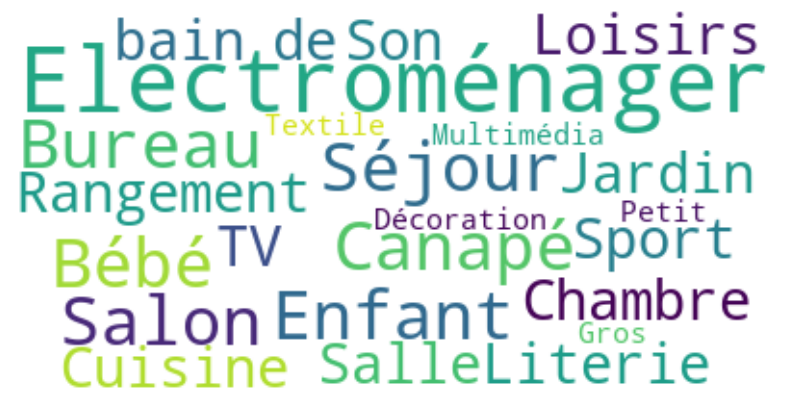

In [19]:
text = ' '.join(d['Univers'].dropna().drop_duplicates())


wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Algorithm to Find Mislabeled Rows or Products

Algorithm that uses the 'Nature' column to detect misclassified rows and creates a 'B_Category' column containing values (True, False):

True: If the row is correctly categorized.

False: If the row is misclassified.

For this, I have created a function to do the job, taking the 'Nature' column as an argument that I want to compare with the 'Libellé produit' column since the 'Nature' column should correspond to the 'Libellé produit' column.

Example: "Lit coffre madrid 140x200 + 1 sommier ch ne bl..." and "Lit adulte" => this row is correctly categorized.

On the other hand, this row is misclassified <= "Nappe antitache ronde infroissable et 100 poly..." and "Linge de table"

In [20]:
def existe(row):
   
    nature_tokens = unidecode(str(row['Nature'])).split()

    
    phrase = unidecode(str(row['Libellé produit'])).lower()

    for token in nature_tokens:
        if token.lower() in phrase:
            return True

    return False


d['String_Exists'] = d.apply(existe, axis=1)
d.head()


,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport,String_Exists
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-22,244,4,6.67,10.0,237.33,True
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-19,28,1,9.92,10.0,18.08,True
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-20,15,1,9.92,10.0,5.08,True
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-25,385,2,20.75,10.0,364.25,True
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-13,61,1,19.08,10.0,41.92,True


## Correction of mislabeled Products

#### Using a Multinomial Naive Bayes NLP model. 

In [27]:
d['Libellé produit'] = d['Libellé produit'].astype(str)
nltk.download('stopwords')
nltk.download('punkt')


stopwords = set(nltk_stopwords.words('french'))

X_text = d['Libellé produit']
X_univers = d['Univers']
y = d['Nature']

unique_categories = y.unique()


le = LabelEncoder()
X_univers_encoded = le.fit_transform(X_univers)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words= list(stopwords))
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_univers_encoded = X_univers_encoded.reshape(-1, 1)
X_combined = hstack([X_text_tfidf, X_univers_encoded])


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
y_pred_filtered = [pred if pred in unique_categories else None for pred in y_pred]


accuracy = accuracy_score(y_test, y_pred_filtered)
report = classification_report(y_test, y_pred_filtered)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\etulyon1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\etulyon1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.8427240773286467
Classification Report:
                       precision    recall  f1-score   support

           Abat jour       0.00      0.00      0.00         2
         Abattant wc       0.00      0.00      0.00        12
      Abri de jardin       0.00      0.00      0.00         9
      Acc telephonie       0.50      0.70      0.58        99
 Access. PC Tablette       0.00      0.00      0.00        20
 Accessoire Barbecue       0.00      0.00      0.00         2
Accessoire allaitem.       0.00      0.00      0.00         1
     Accessoire aspi       0.00      0.00      0.00        32
Accessoire autoradio       0.00      0.00      0.00         3
   Accessoire biblio       0.00      0.00      0.00        34
   Accessoire bureau       0.00      0.00      0.00        26
  Accessoire camping       0.00      0.00      0.00         3
 Accessoire cave vin       0.00      0.00      0.00         3
Accessoire ch adulte       0.89      0.09      0.17        85
Accessoire ch en

c:\Users\etulyon1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [28]:

y_pred = classifier.predict(X_combined)


d['Nature2'] = y_pred
d.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport,String_Exists,Nature2
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-22,244,4,6.67,10.0,237.33,True,Table basse
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-19,28,1,9.92,10.0,18.08,True,Peluche
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-20,15,1,9.92,10.0,5.08,True,Tapis de Salon et Ch
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-25,385,2,20.75,10.0,364.25,True,Chaise
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-13,61,1,19.08,10.0,41.92,True,Meuble tv


### Using Regression (Logistic Regression)

In [29]:
df = d
nltk.download('stopwords')
nltk.download('punkt')


stopwords = set(nltk_stopwords.words('french'))

X_text = df['Libellé produit']  
X_univers = df['Univers']  
y = df['Nature']


unique_categories = y.unique()


le = LabelEncoder()
X_univers_encoded = le.fit_transform(X_univers)


tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=list(stopwords))
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_univers_encoded = X_univers_encoded.reshape(-1, 1)  
X_combined = hstack([X_text_tfidf, X_univers_encoded])


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


y_pred_logreg_filtered = [pred if pred in unique_categories else None for pred in y_pred_logreg]

print('Logistic Regression Train accuracy:', logreg.score(X_train, y_train))

filtered_indices = [i for i, pred in enumerate(y_pred_logreg) if pred in unique_categories]
y_test_filtered = y_test.iloc[filtered_indices]
filtered_predictions = [y_pred_logreg[i] for i in filtered_indices]
filtered_accuracy = accuracy_score(y_test_filtered, filtered_predictions)

print('Logistic Regression Test accuracy for filtered predictions:', filtered_accuracy)
print(confusion_matrix(y_test_filtered, filtered_predictions))
print(classification_report(y_test_filtered, filtered_predictions))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
y_pred = logreg.predict(X_combined)

df['Nature2'] = y_pred

df.tail()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport,String_Exists,Nature2
525029,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,2021-03-31,530,1,70.83,25.0,459.17,True,Lit adulte
525030,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,2021-03-31,15,1,0.00,3.0,15.00,True,Linge de table
525031,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,2021-03-31,23,1,0.00,6.0,23.00,True,Parure de lit
525032,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,2021-03-31,15,2,0.00,7.0,15.00,True,Pièces détachées
525033,211053330,At4 chambre complète carnaval blanc bouleau,Autre vendeur,Chambre Literie,Ensemble chambre,2021-04-01,669,1,0.00,19.0,669.00,True,Ensemble chambre


## Searching for mattresses among the sold products and specifying their dimensions and colors.

In [ ]:

pattern = re.compile(r'Matelas', re.IGNORECASE)


def matelas(row):
    phrase = str(row['Libellé produit'])
    return bool(pattern.search(phrase))


d['matelas'] = d.apply(matelas, axis=1)
d.head()


,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport,String_Exists,Nature2,matelas
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-22,244,4,6.67,10.0,237.33,True,Table basse,False
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-19,28,1,9.92,10.0,18.08,True,Peluche,False
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-20,15,1,9.92,10.0,5.08,True,Objet deco,False
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-25,385,2,20.75,10.0,364.25,True,Chaise,False
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-13,61,1,19.08,10.0,41.92,True,Meuble tv,False


Creating a filter for mattresses and saving it in another dataframe called "mat."

In [ ]:
mat = d[d['matelas'] == True]

In [ ]:


dimension = r'(\d+(?:\.\d+)?(?:\s*[xX*]\s*\d+(?:\.\d+)?)+)(?:\s*[xX*]\s*\d+(?:\.\d+)?)+)\s*(cm|mm|inch|in)?'
couleurs = r'(blanc|noir|rouge|vert|bleu|jaune|rose|violet|marron|orange|gris)'


dimensions = []
couleur = []


for description in mat['Libellé produit']:
    dimension_matches = re.findall(dimension, description)
    couleur_matches = re.findall(couleurs, description, flags=re.IGNORECASE)

    if dimension_matches:
        dimensions.append(dimension_matches[0][0])
    else:
        dimensions.append(None)

    if couleur_matches:
        couleur.append(couleur_matches[0])
    else:
        couleur.append(None)


mat['Dimension'] = dimensions
mat['Couleur'] = couleur

mat['Longueur'] = None
mat['Largeur'] = None

for i, row in mat.iterrows():
    if row['Dimension'] is not None:
        dimensions = row['Dimension'].split('x')
        if len(dimensions) == 2:
            mat.at[i, 'Longueur'] = dimensions[0]
            mat.at[i, 'Largeur'] = dimensions[1]

mat.head()

C:\Users\etulyon1\AppData\Local\Temp\ipykernel_18768\1672759493.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\etulyon1\AppData\Local\Temp\ipykernel_18768\1672759493.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\etulyon1\AppData\Local\Temp\ipykernel_18768\1672759493.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Montant cmd sans transport,String_Exists,Nature2,matelas,Dimension,Couleur,Longueur,Largeur
72,183685444,Surmatelas mousse mémoire de forme 10 zones 90...,Autre vendeur,Chambre Literie,Surmatelas,2021-02-07,31,1,14.08,10.0,16.92,True,Surmatelas,True,90x190,None,90,190
292,182183426,Douceur d interieur housse de clic clac matela...,Autre vendeur,Jardin Loisirs Sport,Housse mobilier ext,2021-01-21,19,1,4.92,8.0,14.08,True,Housse de chaise,True,None,noir,None,None
344,181982876,Matelas Cosy 90x190cm 20 cm d épaisseur Mémoir...,Autre vendeur,Chambre Literie,Matelas,2021-01-18,157,1,0.00,12.0,157.00,True,Surmatelas,True,90x190,None,90,190
352,181986659,Matelas Atlanta 90x200 cm Ep 20cm Mémoire de f...,Autre vendeur,Chambre Literie,Matelas,2021-01-18,176,1,0.00,12.0,176.00,True,Matelas,True,90x200,None,90,200
363,182408336,Lit d enfant maison cabane à sommier à lattes ...,Autre vendeur,Enfant Bébé,Lit jeune,2021-01-23,397,1,0.00,8.0,397.00,True,Lit jeune,True,70 x 140,gris,70,140


An analysis view of the evolution of sales and specific prices for mattresses.

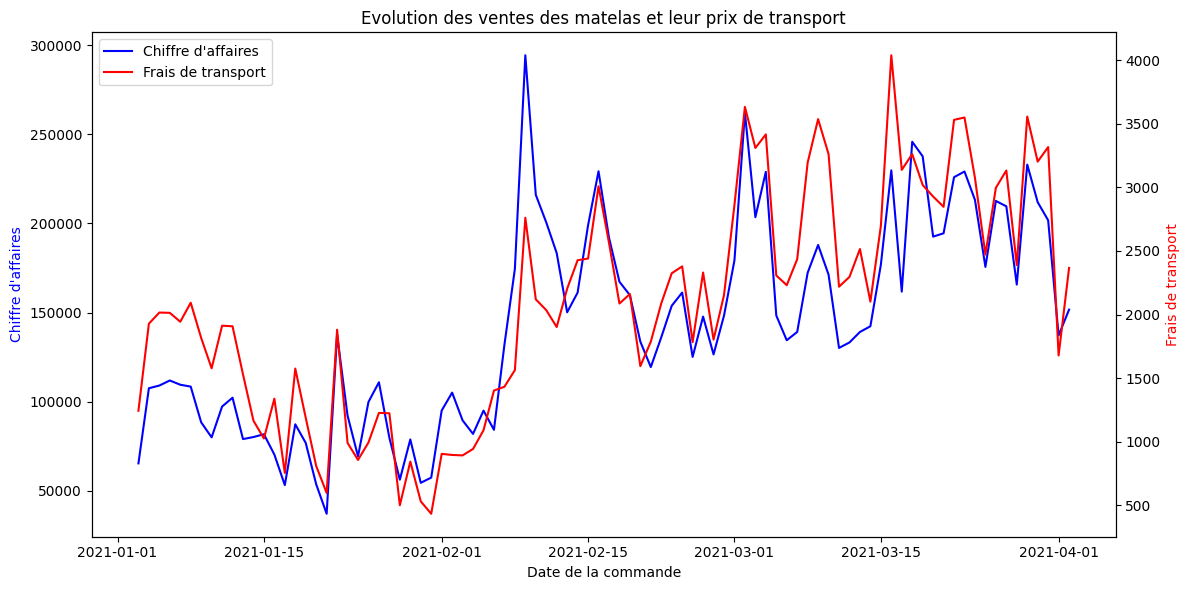

In [ ]:
ma = mat.groupby('Date de commande')[['Montant cmd', 'Prix transport', 'Montant cmd sans transport']].sum().reset_index()


plt.figure(figsize=(12, 6)) 

ax1 = plt.subplot()

ax1.plot(ma['Date de commande'], ma['Montant cmd'], color='b', label='Chiffre d\'affaires')
ax1.set_xlabel('Date de la commande')
ax1.set_ylabel('Chiffre d\'affaires', color='b')

ax2 = ax1.twinx()
ax2.plot(ma['Date de commande'], ma['Prix transport'], color='r', label='Frais de transport')
ax2.set_ylabel('Frais de transport', color='r')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Evolution des ventes des matelas et leur prix de transport')
plt.tight_layout() 
plt.show()



Sales of mattresses by seller

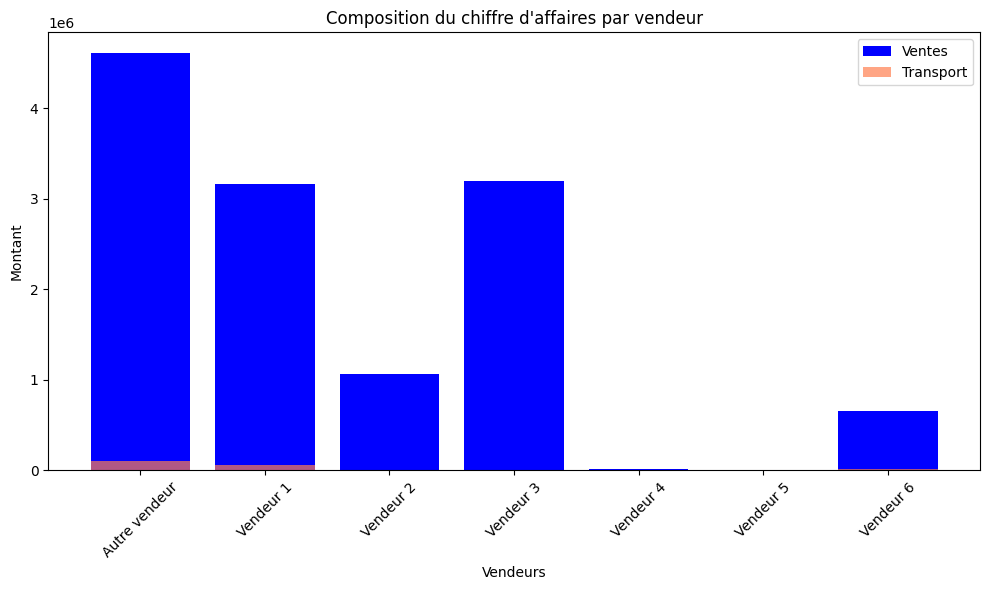

In [ ]:
vendeurs_matelas = mat.groupby('Vendeur')[['Montant cmd sans transport', 'Prix transport', 'Montant cmd']].sum().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
plt.bar(vendeurs_matelas['Vendeur'], vendeurs_matelas['Montant cmd sans transport'], label='Ventes', color='blue')
plt.bar(vendeurs_matelas['Vendeur'], vendeurs_matelas['Prix transport'], label='Transport', color='coral', alpha=0.7)
plt.xlabel('Vendeurs')
plt.ylabel('Montant')
plt.title("Composition du chiffre d'affaires par vendeur")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Influence of transport duration on sales.

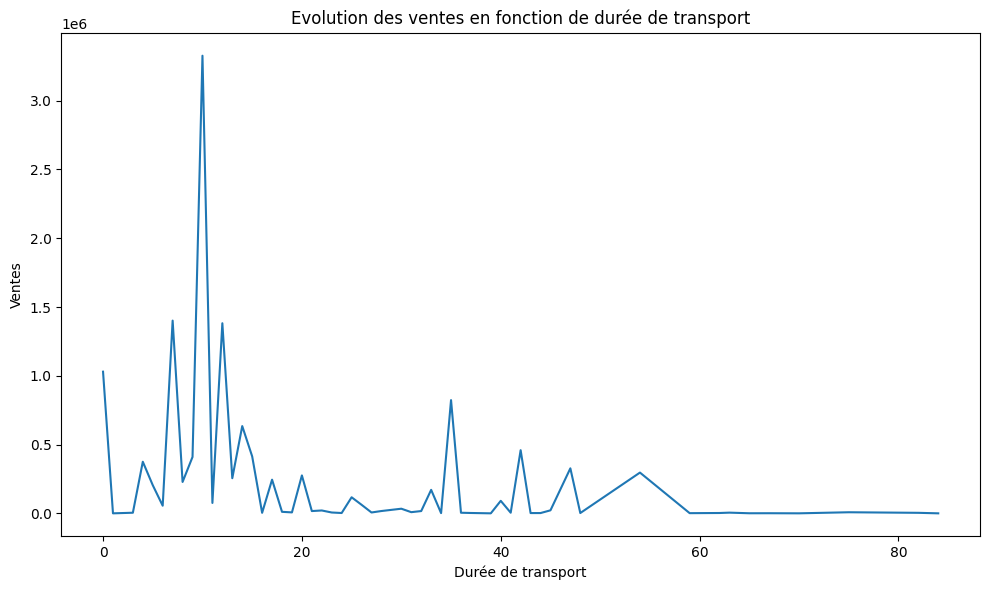

In [ ]:
dure = mat.groupby('Délai transport annoncé')[['Montant cmd sans transport', 'Prix transport', 'Montant cmd']].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax.plot(dure['Délai transport annoncé'], dure['Montant cmd'])

plt.xlabel('Durée de transport')
plt.ylabel('Ventes')
plt.title('Evolution des ventes en fonction de durée de transport')

plt.tight_layout()
plt.show()